# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a>, який зберегли наприкінці попередньої роботи (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. Дослідити ознаки, побудувавши їх візуалізації
2. Порахувати кореляцію між всіма кількісними ознаками
3. Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. Візуально оцініть наявність та силу зв'язку між цими ознаками.   
4. Які кількісні ознаки можуть бути предикторами кількості викидів СО2?
5. Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити ознаки, побудувавши їх візуалізації</p>
</div>


Зчитую дані з файлу у датафрейм

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
drive.mount('/content/drive')

path = "/content/drive/My Drive/data/clean_data2.csv"

Mounted at /content/drive


Будую графіки

Country Name           object
Region                 object
GDP per capita        float64
Population            float64
CO2 emission          float64
Area                    int64
Population density    float64
dtype: object


(0.0, 10806555.307965936)

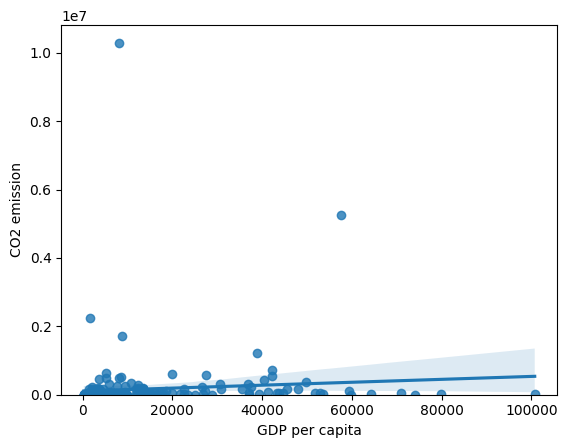

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

df = pd.read_csv(path)
print(df.dtypes)

sns.regplot(x='GDP per capita', y='CO2 emission', data=df)
plt.ylim(0,)


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Порахувати кореляцію між всіма кількісними ознаками</p>
</div>


Рахую кореляцію між всіма кількісними ознаками

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df[['GDP per capita', 'Population', 'CO2 emission', 'Area', 'Population density']].corr()

,GDP per capita,Population,CO2 emission,Area,Population density
GDP per capita,1.000000,-0.047759,0.089094,0.063861,0.243727
Population,-0.047759,1.000000,0.802232,0.453500,-0.028438
CO2 emission,0.089094,0.802232,1.000000,0.585512,-0.017490
Area,0.063861,0.453500,0.585512,1.000000,-0.064006
Population density,0.243727,-0.028438,-0.017490,-0.064006,1.000000


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. </p>
<p>Візуально оцініть наявність та силу зв'язку між цими ознаками.</p>
</div>


Будую діаграму розсіювання для кількісних ознак та 'CO2 emission'

(0.0, 10806760.39289869)

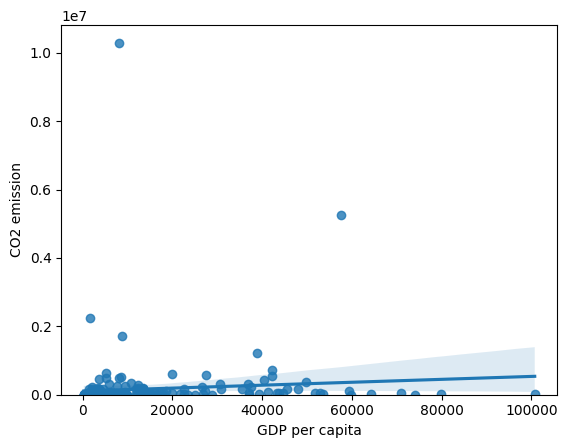

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
sns.regplot(x='GDP per capita', y='CO2 emission', data=df)
plt.ylim(0,)

Зі збільшенням ввп на душу населення викиди СО2 трохи зменшуються. Це вказує на слабку кореляцію між цими двома ознаками. Однак, є винятки, коли країни з високим ВВП мають відносно високі показники викидів CO2



(0.0, 11742409.51649068)

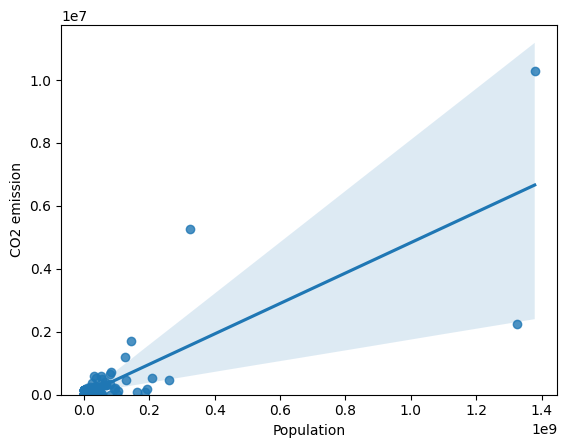

In [ ]:
sns.regplot(x='Population', y='CO2 emission', data=df)
plt.ylim(0,)

 Цей графік вказує на майже відсутність кореляції між цими двома ознаками. Однак, є винятки, коли країни з високою популяцією мають відносно високі показники викидів CO2

In [ ]:
sns.regplot(x='Area', y='CO2 emission', data=df)
plt.ylim(0,)

Зі збільшенням площі викиди СО2 майже не змінюються. Це вказує на слабку кореляцію між цими двома ознаками. Однак, є винятки, коли країни з великою площею мають відносно високі показники викидів CO2

(0.0, 10836279.8842196)

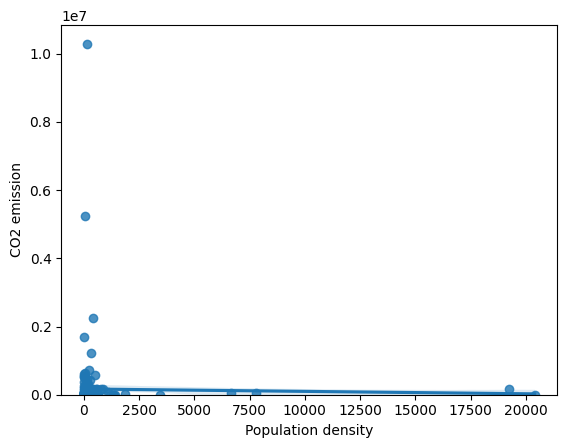

In [ ]:
sns.regplot(x='Population density', y='CO2 emission', data=df)
plt.ylim(0,)

Ця діаграма не показує кореляцію між цими двома показниками

Будую діаграму розмаху для 'CO2 emission' по регіонам

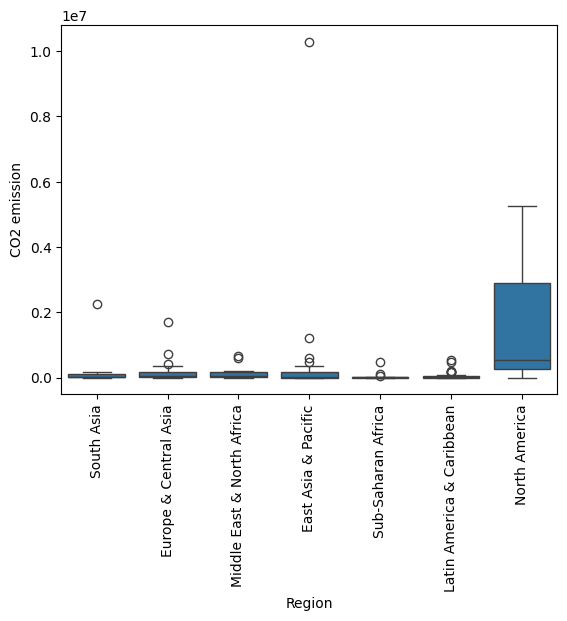

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
sns.boxplot(x='Region', y='CO2 emission', data=df)
plt.xticks(rotation=90)
plt.show()



Ми бачимо що розподіл по регіонах сильно збігається, тому регіон не буде хорошим показником CO2,лише North America вирізняється

<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Які кількісні ознаки можуть бути предикторами кількості викидів СО2?</p>
</div>


Обчислюю коефіцієнт кореляції Пірсона та P-value для всіх кількісних змінних та 'CO2 emission'

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from scipy import stats

variables = ['GDP per capita', 'Population', 'Area', 'Population density']


correlations = [stats.pearsonr(df[var], df['CO2 emission']) for var in variables]


df_corr = pd.DataFrame(correlations, columns=['Pearson Correlation Coefficient', 'P-value'], index=variables)
df_corr.reset_index(inplace=True)

df_corr


,index,Pearson Correlation Coefficient,P-value
0,GDP per capita,0.089094,1.910551e-01
1,Population,0.802232,4.637918e-50
2,Area,0.585512,2.315748e-21
3,Population density,-0.017490,7.978112e-01


Кількість населення та площа країни можуть бути важливими факторами, що впливають на обсяг викидів CO2. Це підтверджується сильною та помірною кореляціями Пірсона відповідно, а також значенням Р-value < 1e-3, що свідчить про статистичну значимість цих кореляцій.

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам</p>
</div>


Групую дані, щоб побачити чи впливає 'Region' на 'CO2 emission'.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
grouped_df = df[['Region', 'CO2 emission']].groupby(['Region'])
grouped_df.mean()

,CO2 emission
Region,
East Asia & Pacific,3.918692e+05
Europe & Central Asia,1.217805e+05
Latin America & Caribbean,5.682480e+04
Middle East & North Africa,1.312287e+05
North America,1.930683e+06
South Asia,3.145543e+05
Sub-Saharan Africa,1.700846e+04


Скористаюсь функцією <code>f_oneway</code> з модуля "stats" для отримання F-test score та P-value.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from scipy import stats

group_names = grouped_df.Region.unique()
emissions_by_region = [ grouped_df.get_group(group[0])['CO2 emission'] for group in group_names]
f, p = stats.f_oneway(*emissions_by_region)


print(f" ANOVA F-test score: {f}")
print(f" ANOVA P-value: {p}")


Результат із високим показником тесту, який показує  сильну кореляцію, і P-value     майже 0 , що  говорить про впевнену статистичну значущість. Але чи означає це, що досліджувані групи сильно корелюють між собою?

Розглянемо їх окремо.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
#Для перевірки нормальності розподілу даних у групах, використаю тест shapiro
from scipy.stats import shapiro

for i, group in enumerate(emissions_by_region):
  print(f'\n{group_names[i][0]}:\n'+
        f'{stats.shapiro(group)}')

#використаю тест  Краскела-Уоліса
from scipy.stats import kruskal


print(stats.kruskal(*emissions_by_region))
print(stats.kruskal(emissions_by_region[0], emissions_by_region[1]))




East Asia & Pacific:
ShapiroResult(statistic=0.22866499423980713, pvalue=1.0137837834836572e-12)

Europe & Central Asia:
ShapiroResult(statistic=0.4698972702026367, pvalue=3.7022774711410744e-13)

Latin America & Caribbean:
ShapiroResult(statistic=0.5404197573661804, pvalue=2.83462864292261e-10)

Middle East & North Africa:
ShapiroResult(statistic=0.6643725633621216, pvalue=1.0225892765447497e-05)

North America:
ShapiroResult(statistic=0.8257257342338562, pvalue=0.17751876623135032)

South Asia:
ShapiroResult(statistic=0.47273802757263184, pvalue=4.837930646317545e-06)

Sub-Saharan Africa:
ShapiroResult(statistic=0.21524322032928467, pvalue=1.385663315995678e-14)
KruskalResult(statistic=40.14755173399021, pvalue=4.2609009645242947e-07)
KruskalResult(statistic=3.0164664320691212, pvalue=0.08242287596665705)


Виявлено, що при проведенні дисперсійного аналізу для категорій “South Asia” та “Europe & Central Asia” p-значення вище за 0.1. Це означає, що отриманий показник Краскела-Уоліса не має статистичної значущості. Таким чином, ми не можемо відхилити гіпотезу про те, що середні значення цих двох груп є однаковими. Отже, ми не можемо стверджувати, що існує значуща різниця в кореляції між цими групами.

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

Групування кількісної змінної в категорії було в попередній лабораторній роботі. Використайте функцію "cut"
</details>

Пара регіонів, що відрізняється найсильніше:
North America та Sub-Saharan Africa
F=29.889184991922967 P=1.5319132629213808e-06


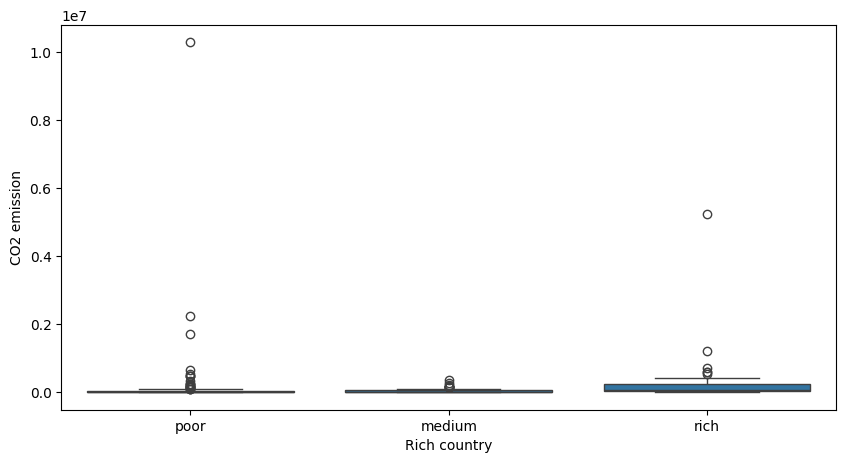

Кількість викидів вуглекислого газу не має лінійного звязку з ти наскільки багата країна
ANOVA results: F = 1.0847596358402931 , P = 0.33983403792468514
medium:
ShapiroResult(statistic=0.7036908864974976, pvalue=7.651616229509273e-09)
poor:
ShapiroResult(statistic=0.14868545532226562, pvalue=1.0329549007938381e-23)
rich:
ShapiroResult(statistic=0.34262341260910034, pvalue=2.500808804831167e-12)
KruskalResult(statistic=24.124080450773686, pvalue=5.774607753200891e-06)


In [ ]:
# #завдання 1
n = len(emissions_by_region)
regions = [float('-inf'), 0, 1, 0.01]
for i1 in range(0, n-1):
  for i2 in range(i1+1, n):
    f, p = stats.f_oneway(emissions_by_region[i1], emissions_by_region[i2])
    if f > regions[0] and p < 0.05:
      regions = [f, i1, i2, p]
r1 = group_names[regions[1]][0]
r2 = group_names[regions[2]][0]
f = regions[0]
p = regions[3]
print('Пара регіонів, що відрізняється найсильніше:')
print(f'{r1} та {r2}\nF={f} P={p}')

#завдання 2
def categorize_gdp(gdp):
  if gdp < 10_000:
    return 'poor'
  if gdp < 20_000:
    return 'medium'
  return 'rich'

df['Rich country'] = df['GDP per capita'].apply(categorize_gdp)

plt.figure(figsize=(10, 5))
sns.boxplot(x='Rich country', y='CO2 emission', data=df)
plt.show()
print('Кількість викидів вуглекислого газу не має лінійного звязку з тим наскільки багата країна')



#завдання 3
grouped_df = df[['Rich country', 'CO2 emission']].groupby(['Rich country'])
group_names = grouped_df['Rich country'].unique()
groups = [
    grouped_df.get_group(group[0])['CO2 emission']
    for group in group_names
]
f_val, p_val = stats.f_oneway(*groups)
print("ANOVA results: F =", f_val, ", P =", p_val)


for i, group in enumerate(groups):
  print(f'{group_names[i][0]}:\n'+
        f'{stats.shapiro(group)}')

print(stats.kruskal(*groups))

Я отримала результат з високим значенням кореляції та P-значенням, що наближається до нуля, що свідчить про високу статистичну впевненість. Однак, чи це означає, що між трьома досліджуваними групами існує сильна кореляція?

In [ ]:
print(stats.kruskal(groups[0], groups[1]))

KruskalResult(statistic=0.08807490058684636, pvalue=0.7666389363724289)


Було виявлено, що дисперсійний аналіз для категорій "medium" та "poor" показує високе значення p-value > 0.1, тому визначений показник Краскела-Уоліса не має статистичної значущості. Це свідчить про те, що ми не можемо відхилити гіпотезу про те, що середні значення цих двох груп є однаковими, тобто ми не можемо стверджувати про значущість різниці в кореляції.

<h2>Виконав студент групи ІП-21 <br> Скрипець Ольга</h2>